In [ ]:
#Real time Microsoft stock: https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9637,2024-06-10,424.700012,428.079987,423.890015,427.869995,427.869995,14003000
9638,2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100
9639,2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200
9640,2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600


In [ ]:
#2 important fields
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9637,2024-06-10,427.869995
9638,2024-06-11,432.679993
9639,2024-06-12,441.059998
9640,2024-06-13,441.579987


In [ ]:
#column Date has type of object
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9637    2024-06-10
9638    2024-06-11
9639    2024-06-12
9640    2024-06-13
9641    2024-06-14
Name: Date, Length: 9642, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2]) #0,1,2: vị trí y,m,d trong mảng split
    return datetime.datetime(year=year, month=month, day=day)

#test the funcion
datetime_object = str_to_datetime('2015-01-01')
datetime_object

datetime.datetime(2015, 1, 1, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9637   2024-06-10
9638   2024-06-11
9639   2024-06-12
9640   2024-06-13
9641   2024-06-14
Name: Date, Length: 9642, dtype: datetime64[ns]

In [ ]:
#take Date column as index
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-06-10,427.869995
2024-06-11,432.679993
2024-06-12,441.059998


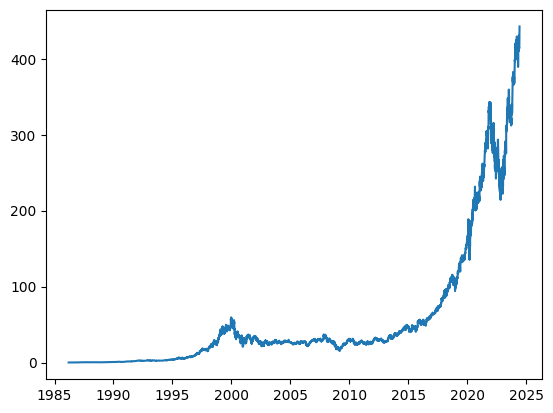

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

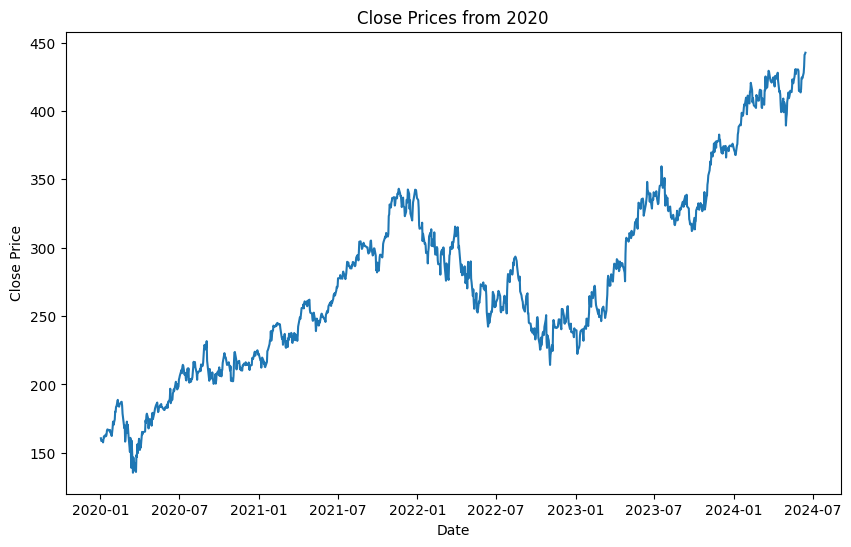

In [ ]:
#take a closer look around 2020-present
filtered_df = df.loc['2020-01-01':]

plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Close'])
plt.title('Close Prices from 2020')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
#supervised learning
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
#(n-i) index days before the target day
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

#train around: '2021-03-25' since there weren't too much fluctuations before
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-06-14',
                                n=3)
windowed_df
#target-x days is the input to feed into the model
#target is the corresponding output

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
807,2024-06-10,424.010010,424.519989,423.850006,427.869995
808,2024-06-11,424.519989,423.850006,427.869995,432.679993
809,2024-06-12,423.850006,427.869995,432.679993,441.059998
810,2024-06-13,427.869995,432.679993,441.059998,441.579987


In [ ]:
#convert the target days into 3D arrays to feed into a tensorflow model
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0] #target date

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) #3D array: number of observations, number of middle columns, number of variables (1 in this case)

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((812,), (812, 3, 1), (812,))

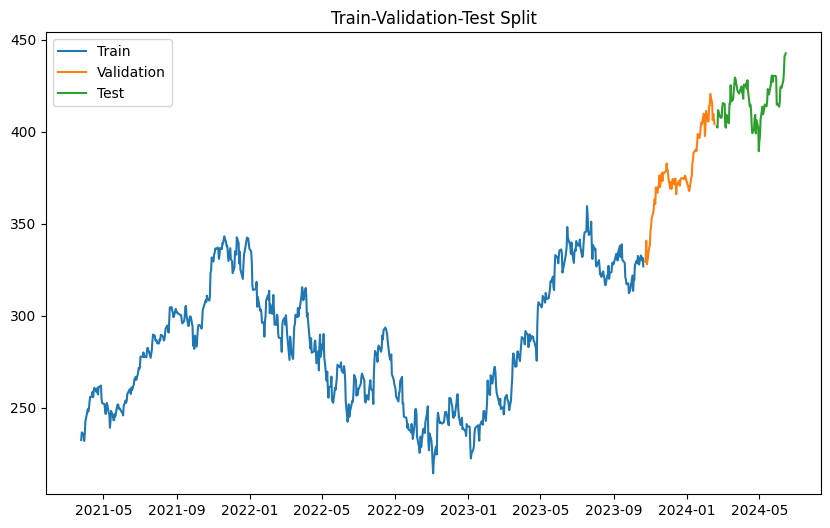

In [ ]:
#80% train, 10% validation, 10% test
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.title('Train-Validation-Test Split')

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)), #3 days in the past, 1 feature
                    layers.LSTM(64), #64 neurons to avoid overfitting
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]) #1 predicted output

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001), #0.001 thay đổi tùy TH
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
21/21 [==============================] - 4s 34ms/step - loss: 81971.8047 - mean_absolute_error: 284.3064 - val_loss: 142069.0312 - val_mean_absolute_error: 376.2971
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 80815.7656 - mean_absolute_error: 282.2618 - val_loss: 139730.9375 - val_mean_absolute_error: 373.1773
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 78374.3359 - mean_absolute_error: 277.9042 - val_loss: 135533.0938 - val_mean_absolute_error: 367.5096
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 74232.3125 - mean_absolute_error: 270.3468 - val_loss: 128125.9766 - val_mean_absolute_error: 357.2894
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 67028.5078 - mean_absolute_error: 256.6413 - val_loss: 115281.1875 - val_mean_absolute_error: 338.8381
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 56208.1250 - mean_absolute_error: 234.5535 - v

21/21 [==============================] - 0s 2ms/step


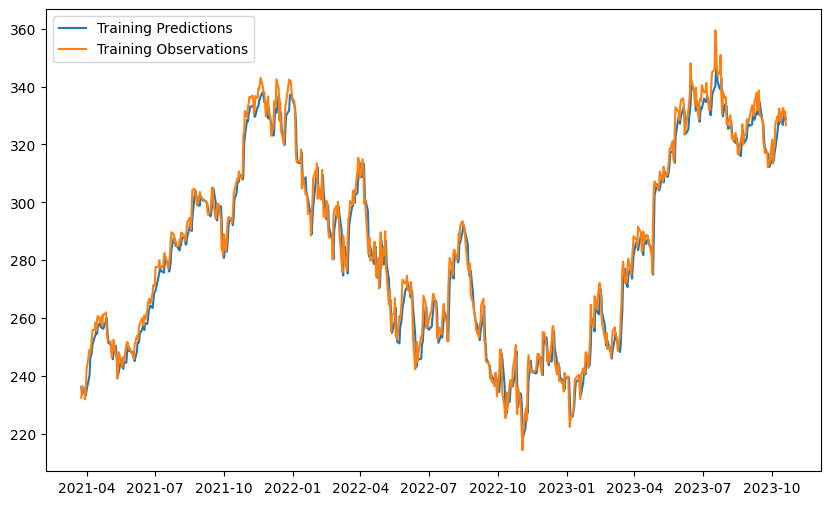

In [ ]:
train_predictions = model.predict(X_train).flatten() #flatten to convert the prediction result into 1D array

plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 3ms/step


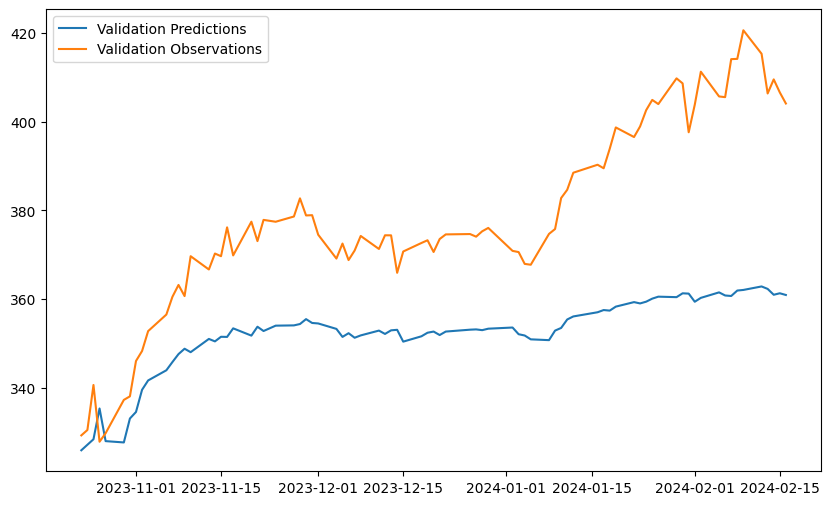

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 4ms/step


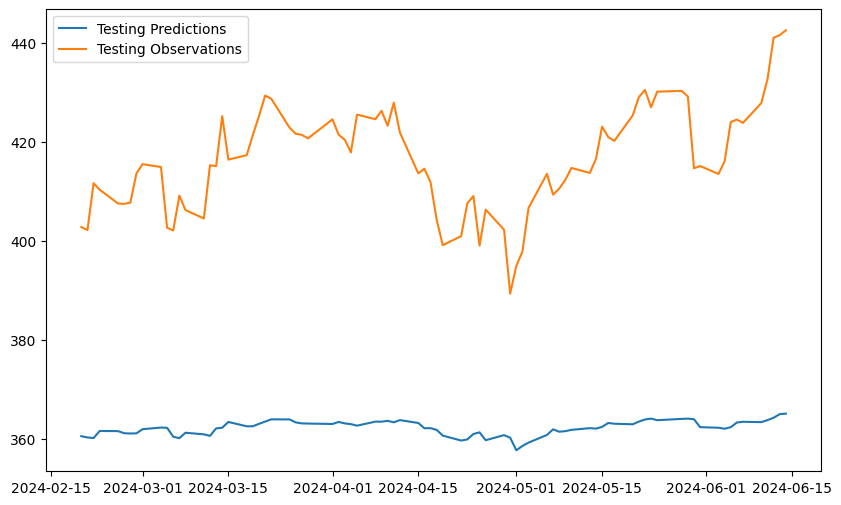

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

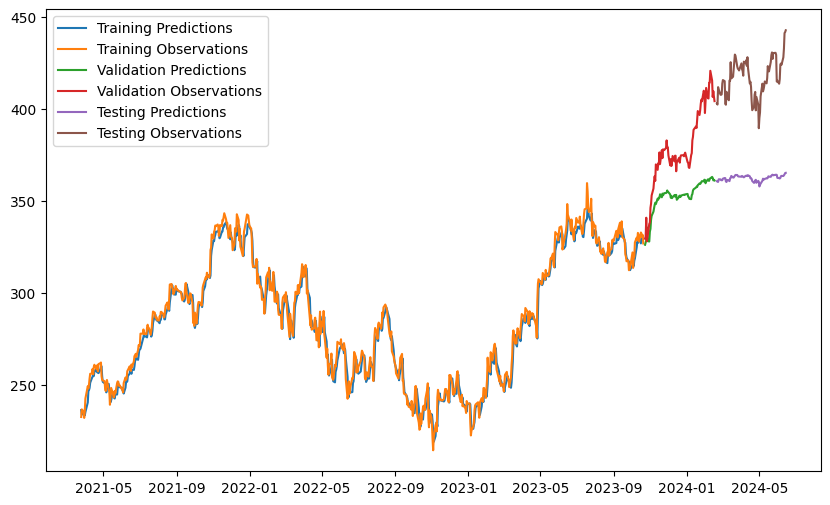

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
#make a recursive prediction
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1]) #take the last col in X_train
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction #recursive update

1/1 [==============================] - 0s 22ms/step


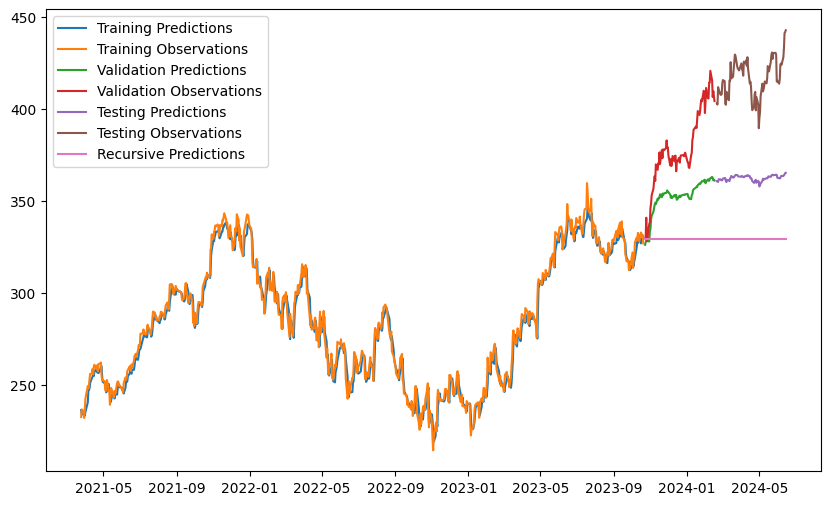

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])


##Apply K-fold cross-validation to improve the model


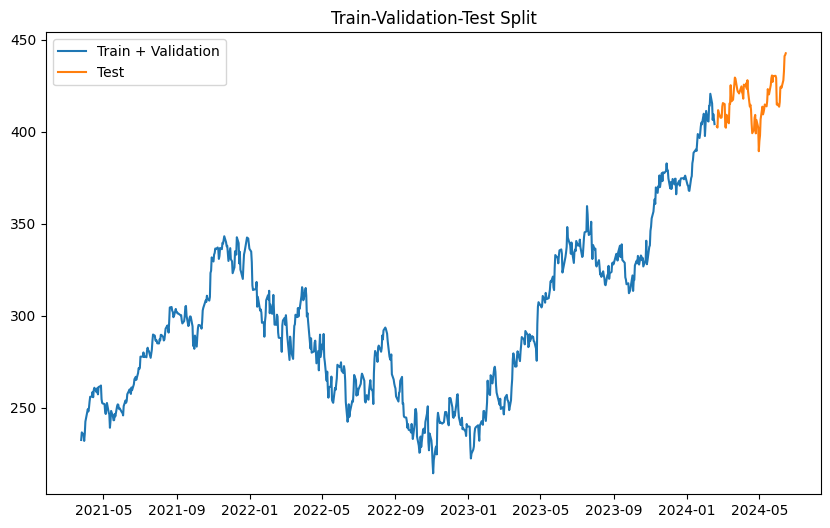

In [ ]:
# 90% train + validation, 10% test
q_90 = int(len(dates) * .9)

dates_train_val, X_train_val, y_train_val = dates[:q_90], X[:q_90], y[:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train_val, y_train_val, label='Train + Validation')
plt.plot(dates_test, y_test, label='Test')
plt.title('Train-Validation-Test Split')
plt.legend(['Train + Validation', 'Test'])
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for train_index, val_index in kf.split(X_train_val): #k-fold on train + val
    X_train_kf, X_val_kf = X_train_val[train_index], X_train_val[val_index]
    y_train_kf, y_val_kf = y_train_val[train_index], y_train_val[val_index]

    model = Sequential([layers.Input((3, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])

    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['mean_absolute_error'])

    model.fit(X_train_kf, y_train_kf, validation_data=(X_val_kf, y_val_kf), epochs=100, verbose=0)

    #evaluate the model
    val_mse, val_mae = model.evaluate(X_val_kf, y_val_kf, verbose=0)
    results.append((val_mse, val_mae))

#calculate the mean and standard deviation of the results
mean_mse = np.mean([r[0] for r in results])
std_mse = np.std([r[0] for r in results])
mean_mae = np.mean([r[1] for r in results])
std_mae = np.std([r[1] for r in results])

print(f'Mean MSE: {mean_mse}, Standard Deviation MSE: {std_mse}')
print(f'Mean MAE: {mean_mae}, Standard Deviation MAE: {std_mae}')


Mean MSE: 28.687340545654298, Standard Deviation MSE: 4.616598354950811
Mean MAE: 4.153973340988159, Standard Deviation MAE: 0.3121545594624266


###Retrain the final model on the entire training + validation dataset:
- Utilize all available data (train + validation) so the model can learn more from the entire available data, improving model performance.
- Ensure accurate evaluation on the separate test set.
- Minimize bias and variance by learning from the full dataset.
- Prepare the final model for real-world predictions with maximum information.

In [ ]:
final_model = Sequential([layers.Input((3, 1)),
                          layers.LSTM(64),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)])

final_model.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

final_model.fit(X_train_val, y_train_val, epochs=100, verbose=0)


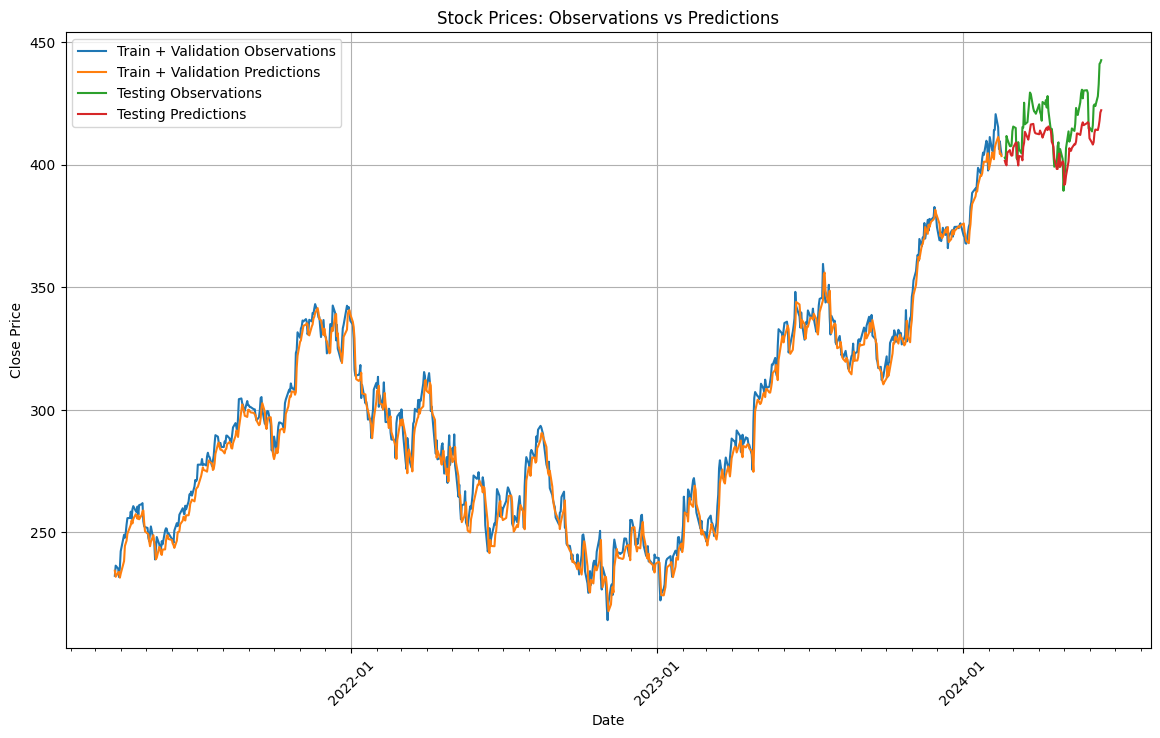

In [ ]:
import matplotlib.dates as mdates

#make predictions
train_val_predictions = final_model.predict(X_train_val, verbose=0)
test_predictions = final_model.predict(X_test, verbose=0)

plt.figure(figsize=(14, 8))

#plot train + validation data
plt.plot(dates_train_val, y_train_val, label='Train + Validation Observations')
plt.plot(dates_train_val, train_val_predictions, label='Train + Validation Predictions')

#plot test data
plt.plot(dates_test, y_test, label='Testing Observations')
plt.plot(dates_test, test_predictions, label='Testing Predictions')

#improve date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices: Observations vs Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


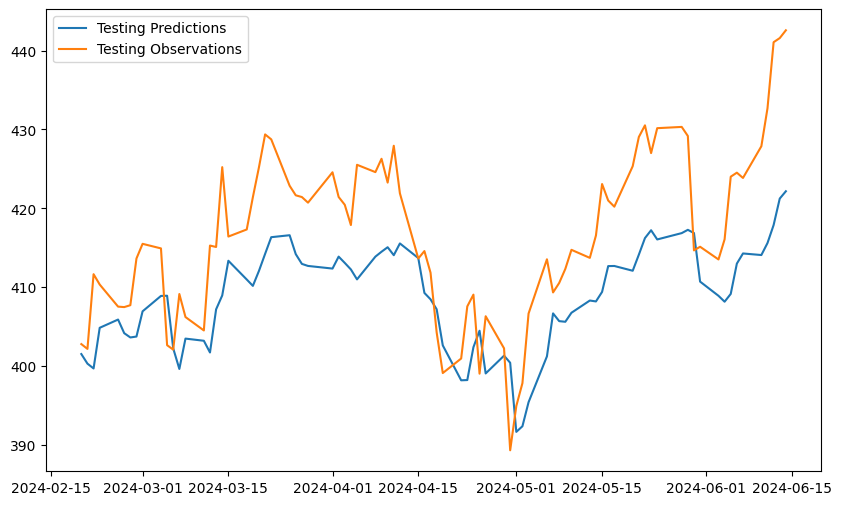

In [ ]:
#closer look when apply the model for test set
plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])